In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,ShuffleSplit
import numpy as np
import random
import pandas as pd
def CreateDataByRatio(data,size):
  # data_new =pd.DataFrame(columns=['label','feature'])
  data_new=[]
  # print(data[['label','feature']])
  data_random=np.array( data[['label','feature','feature_v']])
  random.shuffle(data_random)
  while len(data_new)< size:
    data_new.append(random.choice(data_random))
  return pd.DataFrame(data_new,columns=['label','feature','feature_v'])

In [ ]:
def ReadDataToCsvFile(path_csv_file):
  data=pd.read_csv(path_csv_file,encoding='utf-8', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
  data['label'] = data['label'].apply(lambda label: 0 if label == False else 1)
  return data

In [ ]:
def GetDataByLabel(data,label):
  dataByLabel =data[data.label==label]
  return dataByLabel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [ ]:
# data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/new_clean_bo3.csv')
data=ReadDataToCsvFile('/content/drive/MyDrive/DATA-LUAN_VAN/clean_bo3_tdrive.csv')
data['feature'] = data['p_start'] + data['p_temp'] + data['p_end']
data['feature_v']= None
feature_v=[]
for index, row in data.iterrows():
  feature_v.append([row['p_start'][1],row['p_start'][0],row['p_temp'][1],row['p_temp'][0],row['p_end'][1],row['p_end'][0]])

data['feature_v']=feature_v
data.head(10)
print(len(data[data.label==0]))
print(len(data[data.label==1]))

3805
3351


In [ ]:
# ratio test 2:8
# 2 minority
# 8 majority
# data train ratio 0.25% total data
# with total
def GetDataByRatio(total_major,total_minor,ratio_minority,ratio_majority):
  n=round(total_major/total_minor,1)
  print("n" ,n)
  n1=round(ratio_majority/ratio_minority,1)
  print("n1" ,n1)
  if n==n1:
    print("case1")
    return round(total_minor,0),round(total_major,0)
  elif n>n1:
    # giam da so dat ti le
    print("case2")
    return int(total_minor),int((total_minor)*n1)
  else:
    print("case3")
    return int((total_major)/n1) ,int(total_major)

In [ ]:
# da so
total_major=len(data[data.label==0])
# thieu so
total_minor=len(data[data.label==1])
total_minority_train,total_majority_train=GetDataByRatio(total_major,total_minor,1,100)
print("total_minority_train",total_minority_train)
print("total_minor",total_minor)
print("total_major",total_major)
print("total_majority_train",total_majority_train)
print("total_minority_train",total_minority_train)
print("ti le",total_majority_train/total_minority_train)

n 1.1
n1 100.0
case3
total_minority_train 38
total_minor 3351
total_major 3805
total_majority_train 3805
total_minority_train 38
ti le 100.13157894736842


In [ ]:
# nhom thieu so
data_minority =data[data.label==1]
# nhom da so
data_majority =data[data.label==0]
data_minor=CreateDataByRatio(data_minority,total_minority_train)
# print(len(data_minor[data_minor.label==-1]))
data_major=CreateDataByRatio(data_majority,total_majority_train)
print("data_major",len(data_major))
print("data_minor",len(data_minor))
# print(data_major)
# data_new=data_minor.join(data_major)
data_new=data_minor.append(data_major)
print("data_new",len(data_new))
print(len(data_major[data_major.label==1]))

data_major 3805
data_minor 38
data_new 3843
0


In [ ]:
import sklearn.metrics
import math
def matrix_metrix(y_true, y_pred,beta):
   CM = confusion_matrix(y_true,y_pred)
   TN = CM[0][0]
   FN = CM[1][0]
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 )
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 )
   LRNeg      = round( FNR / TNR ,4 )
   DOR        =0 # round( LRPos/LRNeg)
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,F1,FBeta,MCC,BM,MK]})
   return (mat_met)

In [ ]:
from sklearn.metrics import classification_report,f1_score, confusion_matrix,recall_score, accuracy_score,precision_score, precision_recall_fscore_support,roc_auc_score, roc_curve, auc
from imblearn.metrics import geometric_mean_score,sensitivity_score,specificity_score
import seaborn as sn

import matplotlib.pyplot as plt
def clf_report(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))
    cm = confusion_matrix(y_true,y_pred, labels=[-1,1])
    print(cm)
    df_cm = pd.DataFrame(cm,columns = ['Normal','Anomaly'])
    df_cm = df_cm.rename(index = {0:'Normal',1:'Anomaly'})
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()
    print('Precision score',precision_score(y_pred,y_true))
    print('accuracy score',accuracy_score(y_pred,y_true))
    print('Recall score',recall_score(y_pred,y_true))
    print('G-mean score',geometric_mean_score(y_pred,y_true))
    print('F1 score',f1_score(y_pred,y_true))
    print('sensitivity_score',sensitivity_score(y_true, y_pred, average='macro'))
    print('specificity_score',specificity_score(y_true, y_pred, average='macro'))
    print('Weighted accuracy',0.5*sensitivity_score(y_true, y_pred, average='macro')+0.5* specificity_score(y_true, y_pred, average='macro'))
    print('F-statistics',(2*precision_score(y_pred,y_true)*sensitivity_score(y_true, y_pred, average='macro'))/(precision_score(y_pred,y_true)+sensitivity_score(y_true, y_pred, average='macro')))
    beta = 0.4
    mat_met = matrix_metrix(y_true,y_pred,beta)
    print (mat_met)
    return precision_recall_fscore_support(y_true,y_pred,average='macro')

In [ ]:
def clf_roc_auc(y_true,y_pred, y_proba):
  svm_roc_auc=roc_auc_score(y_true,y_pred)
  fpr,tpr,thresholds=roc_curve(y_true,y_proba)
  plt.figure()
  plt.plot(fpr,tpr,label='AUC = %0.2f'%auc(fpr,tpr))
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('Receiver operating characteristic (ROC)')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn import decomposition

X=np.array(data_new['feature_v'].tolist())
y=data_new['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train_PCA=X_train
X_test_PCA=X_test
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_PCA)
X_train_PCA = pca.transform(X_train_PCA)

pca.fit(X_test_PCA)
X_test_PCA = pca.transform(X_test_PCA)
# print(X_train_PCA.shape)


print(X_test.shape)
print(X_train.shape)
print(X_test_PCA.shape)
print(X_train_PCA.shape)
# X_train_m = vectorizer.fit_transform(X_train)
# X_test_m = vectorizer.transform(X_test)
X_train_m=X_train_PCA
X_test_m=X_test_PCA

(961, 6)
(2882, 6)
(961, 3)
(2882, 3)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ratio_over 0.10324978749318157
ratio_under 0.5811011411001805
ratio_over 0.10324978749318157
ratio_under 0.5811011411001805
Counter({0: 505, 1: 294})
g_mean: 0.18426185980164514
ratio_over 0.37776888346454596
ratio_under 0.7427518006607737
ratio_over 0.37776888346454596
ratio_under 0.7427518006607737
Counter({0: 1451, 1: 1078})
g_mean: 0.16365581726750372
ratio_over 0.33225053218309186
ratio_under 0.7905689689305101
ratio_over 0.33225053218309186
ratio_under 0.7905689689305101
Counter({0: 1199, 1: 948})
g_mean: 0.15491540203519635
ratio_over 0.2356518202956736
ratio_under 0.6272610297416182
ratio_over 0.2356518202956736
ratio_under 0.6272610297416182
Counter({0: 1072, 1: 673})
g_mean: 0.1861876020963282
ratio_over 0.3918810987426219
ratio_under 0.6955718173934816
ratio_over 0.3918810987426219
ratio_under 0.6955718173934816
Counter({0: 1608, 1: 1119})
g_mean: 0.16591807984348803
ratio_over

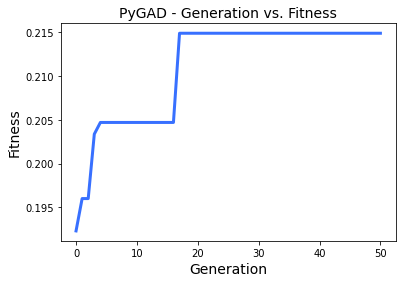

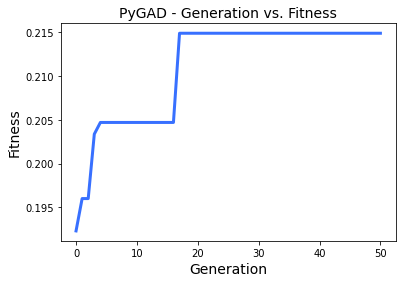

In [ ]:
!pip install pygad
import pygad
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import numpy
function_inputs = y_test
desired_output =0.2
ratio_over=0.1
ratio_under=0.9
def fitness_func_svm(solution, solution_idx):
  ratio_over=random.uniform(0.1, 0.4)
  print('ratio_over',ratio_over)
  ratio_under=random.uniform(0.5, 0.8)
  print('ratio_under',ratio_under)
  # ratio_over=random.uniform(0.1, 0.9)
  # if 0.1<= ratio_over <= 0.2:
  #   ratio_under=random.uniform(0.8, 0.9)
  # if 0.2< ratio_over <= 0.4:
  #   ratio_under=random.uniform(0.6, 0.8)
  # if 0.4< ratio_over <= 0.6:
  #   ratio_under=random.uniform(0.4, 0.6)
  # if 0.6< ratio_over <= 0.8:
  #   ratio_under=random.uniform(0.2, 0.4)
  # if 0.8< ratio_over <= 1:
  #   ratio_under=random.uniform(0, 0.2)


  print('ratio_over',ratio_over)

  print('ratio_under',ratio_under)
  over = SMOTE(sampling_strategy=ratio_over)
  under = RandomUnderSampler(sampling_strategy=ratio_under)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X_over, y_over = pipeline.fit_resample(X_train_m, y_train)
  print(Counter(y_over))
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_over,y_over)
  y_train_pred = clf.predict(X_over)
  y_pred=clf.predict(X_test_m)

  g_mean= geometric_mean_score(y_pred,y_test)
  print('g_mean:',g_mean)
  fitness =g_mean
  #  1.0 / numpy.abs(g_mean - desired_output)
  # except:
  #   fitness=0
  return fitness

fitness_function = fitness_func_svm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 8
num_genes = len(function_inputs)
init_range_low = -4
init_range_high =4
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "single_point"
mutation_type = "random"
random_mutation_min_val=0
random_mutation_max_val=1.0
mutation_percent_genes = 10
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('solution',len(solution))
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[949   0]
 [ 12   0]]


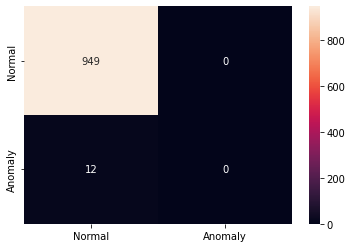

Precision score 0.0
accuracy score 0.9875130072840791
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  949.0000
2           FP    0.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9875
6    Precision       NaN
7          NPV    0.9875
8          FDR       NaN
9          FOR    0.0125
10   check_Pos       NaN
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0000
14         FNR    1.0000
15         TNR    1.0000
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+       NaN
19         LR-    1.0000
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC       NaN
24          BM    0.0000
25          MK       NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

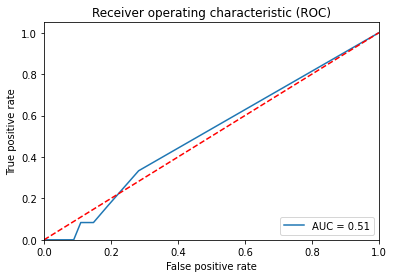

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_m,y_train)
y_train_pred = clf.predict(X_train_m)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)


# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[949   0]
 [ 12   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


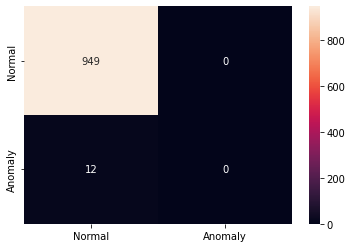

Precision score 0.0
accuracy score 0.9875130072840791
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  949.0000
2           FP    0.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9875
6    Precision       NaN
7          NPV    0.9875
8          FDR       NaN
9          FOR    0.0125
10   check_Pos       NaN
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0000
14         FNR    1.0000
15         TNR    1.0000
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+       NaN
19         LR-    1.0000
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC       NaN
24          BM    0.0000
25          MK       NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

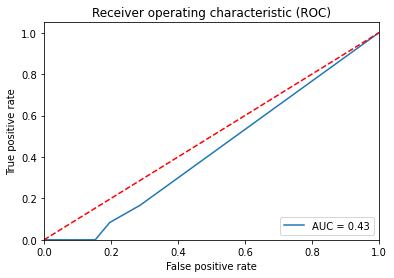

In [ ]:
from imblearn.under_sampling import TomekLinks

TomekLink = TomekLinks(sampling_strategy='majority')
X_over, y_over = TomekLink.fit_resample(X_train_m, y_train)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({-1: 2856, 1: 2856})
              precision    recall  f1-score   support

      Normal       0.99      0.88      0.93       949
     Anomaly       0.03      0.25      0.05        12

    accuracy                           0.87       961
   macro avg       0.51      0.57      0.49       961
weighted avg       0.98      0.87      0.92       961

[[836 113]
 [  9   3]]


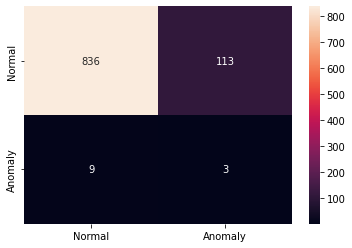

Precision score 0.25
accuracy score 0.8730489073881373
Recall score 0.02586206896551724
G-mean score 0.159958166332749
F1 score 0.046875
sensitivity_score 0.565463645943098
specificity_score 0.565463645943098
Weighted accuracy 0.565463645943098
F-statistics 0.34671297044096266
        Metric     Value
0           TP    3.0000
1           TN  836.0000
2           FP  113.0000
3           FN    9.0000
4   Prevalence    0.1200
5     Accuracy    0.8730
6    Precision    0.0259
7          NPV    0.9893
8          FDR    0.9741
9          FOR    0.0107
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.2500
13         FPR    0.1191
14         FNR    0.7500
15         TNR    0.8809
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    2.0991
19         LR-    0.8514
20         DOR    0.0000
21          F1    0.0469
22       FBeta    0.0296
23         MCC    0.0446
24          BM    0.1309
25          MK    0.0152


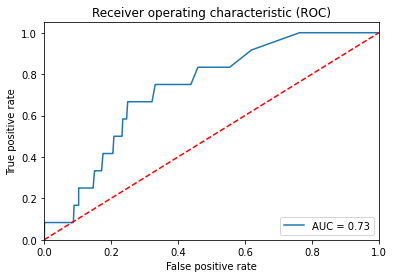

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
# G_mean_score=geometric_mean_score(y_test,y_pred)
print(Counter(y_train))

oversample = SMOTE(random_state=42,k_neighbors=5)
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({-1: 2856, 1: 2853})
              precision    recall  f1-score   support

      Normal       0.99      0.88      0.93       949
     Anomaly       0.03      0.25      0.05        12

    accuracy                           0.87       961
   macro avg       0.51      0.56      0.49       961
weighted avg       0.98      0.87      0.92       961

[[833 116]
 [  9   3]]


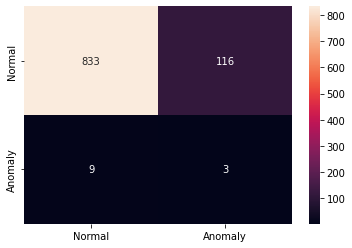

Precision score 0.25
accuracy score 0.8699271592091571
Recall score 0.025210084033613446
G-mean score 0.15792598765623458
F1 score 0.04580152671755725
sensitivity_score 0.5638830347734458
specificity_score 0.5638830347734458
Weighted accuracy 0.5638830347734458
F-statistics 0.3464152775530021
        Metric     Value
0           TP    3.0000
1           TN  833.0000
2           FP  116.0000
3           FN    9.0000
4   Prevalence    0.1200
5     Accuracy    0.8699
6    Precision    0.0252
7          NPV    0.9893
8          FDR    0.9748
9          FOR    0.0107
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.2500
13         FPR    0.1222
14         FNR    0.7500
15         TNR    0.8778
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    2.0458
19         LR-    0.8544
20         DOR    0.0000
21          F1    0.0458
22       FBeta    0.0288
23         MCC    0.0431
24          BM    0.1278
25          MK    0.0145


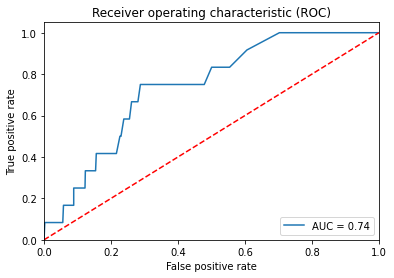

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks

print(Counter(y_train))
ratio =1
model = DecisionTreeClassifier()
count_over=int(ratio*2856)

pipe1 = make_pipeline(SMOTE(sampling_strategy={1: count_over},k_neighbors=5), TomekLinks())
X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[947   2]
 [ 12   0]]


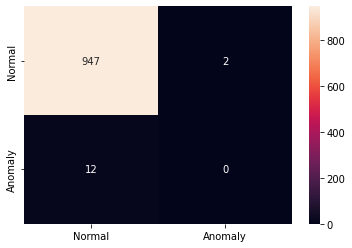

Precision score 0.0
accuracy score 0.9854318418314256
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.49894625922023184
specificity_score 0.49894625922023184
Weighted accuracy 0.49894625922023184
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  947.0000
2           FP    2.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9854
6    Precision    0.0000
7          NPV    0.9875
8          FDR    1.0000
9          FOR    0.0125
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0021
14         FNR    1.0000
15         TNR    0.9979
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    0.0000
19         LR-    1.0021
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC   -0.0051
24          BM   -0.0021
25          MK   -0.0125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


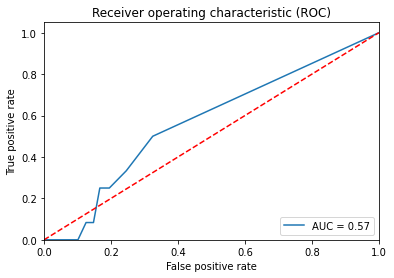

In [ ]:
from pandas.core.common import random_state
from imblearn.over_sampling import RandomOverSampler
from  sklearn.calibration  import CalibratedClassifierCV
RandomOver = RandomOverSampler(random_state=0)
X_over, y_over = RandomOver.fit_resample(X_train_m, y_train)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

Counter({-1: 2856, 1: 26})
Counter({-1: 2856, 1: 2856})
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.99       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.98      0.99      0.98       961

[[949   0]
 [ 12   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


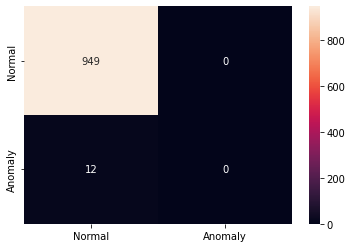

Precision score 0.0
accuracy score 0.9875130072840791
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.5
specificity_score 0.5
Weighted accuracy 0.5
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  949.0000
2           FP    0.0000
3           FN   12.0000
4   Prevalence    0.0000
5     Accuracy    0.9875
6    Precision       NaN
7          NPV    0.9875
8          FDR       NaN
9          FOR    0.0125
10   check_Pos       NaN
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0000
14         FNR    1.0000
15         TNR    1.0000
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+       NaN
19         LR-    1.0000
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC       NaN
24          BM    0.0000
25          MK       NaN


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-

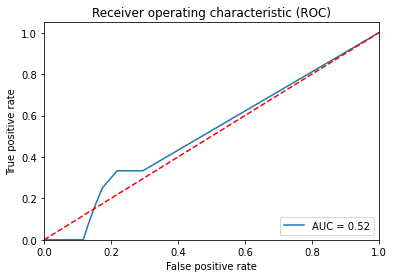

In [ ]:
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from  sklearn.calibration  import CalibratedClassifierCV
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks

print(Counter(y_train))
ratio =1

count_over=int(ratio*2856)

pipe1 = make_pipeline(RandomOverSampler(sampling_strategy={1: count_over}), TomekLinks())
X_over, y_over = pipe1.fit_resample(X_train_m, y_train)
print(Counter(y_over))
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      0.88      0.93       949
     Anomaly       0.03      0.25      0.05        12

    accuracy                           0.87       961
   macro avg       0.51      0.56      0.49       961
weighted avg       0.98      0.87      0.92       961

[[832 117]
 [  9   3]]


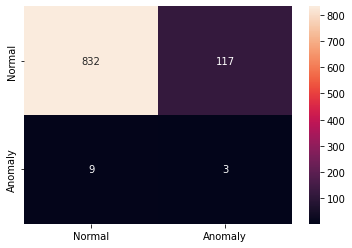

Precision score 0.25
accuracy score 0.8688865764828304
Recall score 0.025
G-mean score 0.15726557587574316
F1 score 0.045454545454545456
sensitivity_score 0.5633561643835616
specificity_score 0.5633561643835616
Weighted accuracy 0.5633561643835616
F-statistics 0.3463157894736842
        Metric     Value
0           TP    3.0000
1           TN  832.0000
2           FP  117.0000
3           FN    9.0000
4   Prevalence    0.1200
5     Accuracy    0.8689
6    Precision    0.0250
7          NPV    0.9893
8          FDR    0.9750
9          FOR    0.0107
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.2500
13         FPR    0.1233
14         FNR    0.7500
15         TNR    0.8767
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    2.0276
19         LR-    0.8555
20         DOR    0.0000
21          F1    0.0455
22       FBeta    0.0285
23         MCC    0.0426
24          BM    0.1267
25          MK    0.0143


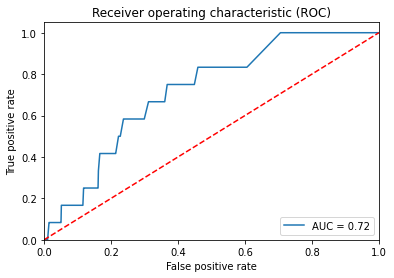

In [ ]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X_over, y_over= oversample.fit_resample(X_train_m, y_train)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])

              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98       949
     Anomaly       0.00      0.00      0.00        12

    accuracy                           0.96       961
   macro avg       0.49      0.48      0.49       961
weighted avg       0.97      0.96      0.97       961

[[920  29]
 [ 12   0]]


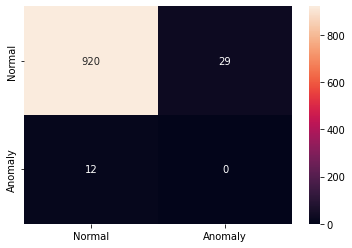

Precision score 0.0
accuracy score 0.9573361082206036
Recall score 0.0
G-mean score 0.0
F1 score 0.0
sensitivity_score 0.48472075869336145
specificity_score 0.48472075869336145
Weighted accuracy 0.48472075869336145
F-statistics 0.0
        Metric     Value
0           TP    0.0000
1           TN  920.0000
2           FP   29.0000
3           FN   12.0000
4   Prevalence    0.0300
5     Accuracy    0.9573
6    Precision    0.0000
7          NPV    0.9871
8          FDR    1.0000
9          FOR    0.0129
10   check_Pos    1.0000
11   check_Neg    1.0000
12      Recall    0.0000
13         FPR    0.0306
14         FNR    1.0000
15         TNR    0.9694
16  check_Pos2    1.0000
17  check_Neg2    1.0000
18         LR+    0.0000
19         LR-    1.0316
20         DOR    0.0000
21          F1       NaN
22       FBeta       NaN
23         MCC   -0.0198
24          BM   -0.0306
25          MK   -0.0129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


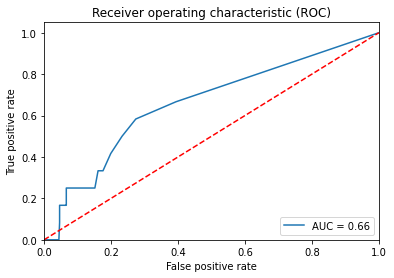

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_over, y_over = oversample.fit_resample(X_train_m, y_train)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_over,y_over)
y_train_pred = clf.predict(X_over)
y_pred=clf.predict(X_test_m)
y_proba=clf.predict_proba(X_test_m)
# precision,recall,fscore,support = clf_report(y_train,y_train_pred)
precision,recall,fscore,support = clf_report(y_test,y_pred)

clf_roc_auc(y_test,y_pred,y_proba[:,1])